In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import struct

dir = '../../mnt/c/Users/louxsoen/Documents/P/Nerual-Network-SCA/Float-Point-NN-Mantissa/Trace/'

In [66]:
relu = np.load(dir + 'relu.npy')
rmlp = np.load(dir + 'mlp.npy')
print(relu.shape)
print(rmlp.shape)

(3, 24000)
(255, 20000)


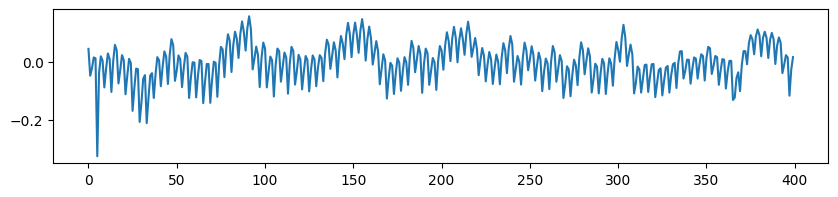

0.8829122406975597


In [67]:

cutsize = 400
strsize = 0
cutR = np.zeros([2, cutsize])
cutR[0] = relu[1][strsize:strsize + cutsize]
cutR[1] = relu[2][strsize:strsize + cutsize]

plt.figure(figsize=(10,2))
plt.plot(cutR[0])
plt.show()

print(np.corrcoef(cutR[0], cutR[1])[0,1])
if cutsize + strsize > 1050:    print("OVER SHOOT")

In [68]:
endpt = 16000
zcoip = 255

corr_minus = np.zeros([zcoip, endpt])
corr_plus  = np.zeros([zcoip, endpt])
max_minus = np.zeros(endpt)
loc_minus = np.zeros(endpt)
max_plus  = np.zeros(endpt)
loc_plus  = np.zeros(endpt)
#for j in range(1, 2):

#  Minus ReLU
for a in range(0, zcoip):
    for i in range(0, endpt, 1):
        mcut = rmlp[a][i:i+cutsize]
        corr_minus[a][i] = np.corrcoef(mcut, cutR[0])[0,1]
        if corr_minus[a][i] > max_minus[a]:
            max_minus[a] = corr_minus[a][i]
            loc_minus[a] = i

#   Plus ReLU
for a in range(0, zcoip):
    for i in range(0, endpt, 1):
        mcut = rmlp[a][i:i+cutsize]
        corr_plus[a][i] = np.corrcoef(mcut, cutR[1])[0,1]
        if corr_plus[a][i] > max_plus[a]:
            max_plus[a] = corr_plus[a][i]
            loc_plus[a] = i


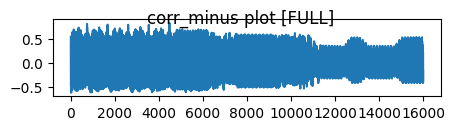

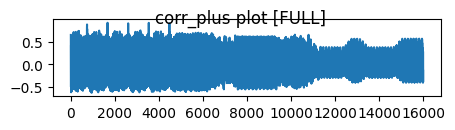

In [69]:
plt.figure(figsize=(5,1))
plt.suptitle('corr_minus plot [FULL]')
plt.plot(corr_minus[0])
plt.show()

plt.figure(figsize=(5,1))
plt.suptitle('corr_plus plot [FULL]')
plt.plot(corr_plus[0])
plt.show()

In [70]:
np.save(dir + "corr_minus", corr_minus)
np.save(dir + "corr_plus",  corr_plus)


f = open(dir + "corrp.crr","wb")
for i in range(zcoip):
    myfmt = 'f' * endpt 
    bin = struct.pack(myfmt, *corr_plus[i])
    f.write(bin)
f.close()

f = open(dir + "corrm.crr","wb")
for i in range(zcoip):
    myfmt = 'f' * endpt 
    bin = struct.pack(myfmt, *corr_minus[i])
    f.write(bin)
f.close()

In [72]:
print(max_minus)
print(loc_minus)

print(max_plus)
print(loc_plus)

[0.84321739 0.8438545  0.8446926  ... 0.         0.         0.        ]
[4476. 4476. 4476. ...    0.    0.    0.]
[0.91394882 0.91364121 0.9152241  ... 0.         0.         0.        ]
[1668. 1668. 1668. ...    0.    0.    0.]
